In [ ]:
import os
import time
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [ ]:
def one_hot(x):
    return np.identity(16)[x:x+1].astype(np.float32)

In [ ]:
env = gym.make('FrozenLake-v0')

# Set Q-learning parameters
num_episodes = 2000
learning_rate = 0.1
dis = .99

# Input and output size based on the Env
input_size = env.observation_space.n
output_size = env.action_space.n

# weight
W = tf.Variable(tf.random.uniform([input_size, output_size], 0, 0.01), dtype=tf.float32)
# optimizer 
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)


In [ ]:
start_time = time.time()
# rewards per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    local_loss = []

    e = 1. / ((i / 50) + 10)
    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedly (with a chance of random action)
        # from the Q-network
        q_value = tf.matmul(one_hot(state), W)
        q_value = np.array(q_value.numpy())

        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_value)

        # Get new state and reward from environment
        state_next, reward, done, _ = env.step(action)
        if done:
            # Update Q, and no q_value+1, since it's action termial state
            q_value[0, action] = reward
        else:
            # Obtain the Q_s` values by feeding the new state through our network
            q_score_next = tf.matmul(one_hot(state_next), W)
            # Update Q
            q_value[0, action] = reward + dis * np.max(q_score_next)

        loss = lambda: tf.reduce_sum(input_tensor=tf.square(q_value - tf.matmul(one_hot(state), W)))
        # optimizer, loss가 작아지는 방향으로 W 업데이트
        optimizer.minimize(loss, var_list=W)
        rAll += reward
        state = state_next
    rList.append(rAll)
    

196.6139771938324 seconds
Success rate: 0.3995


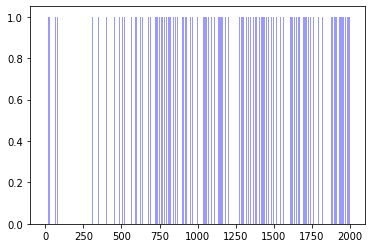

In [ ]:
print(f'{(time.time() - start_time)} seconds')
print("Success rate: " + str(sum(rList) / num_episodes))
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()
